# Initial tests

In [1]:
%matplotlib inline
from klearn_tcyclone.climada.tc_tracks import TCTracks
import numpy as np
from matplotlib import pyplot as plt


In [2]:
tr_irma = TCTracks.from_ibtracs_netcdf(provider='usa', storm_id='2017242N16333') # IRMA 2017


2024-09-01 09:12:17,034 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2023-06-07 23:07:38 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file C:\Users\Eric\climada\data\IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.


d:\work\projects\repositories\koopman_learning_tropical_cyclone\.venv\lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
d:\work\projects\repositories\koopman_learning_tropical_cyclone\.venv\lib\site-packages\climada\hazard\tc_tracks.py:614: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if ibtracs_ds.dims['storm'] == 0:


Text(0.5, 1.0, 'IRMA')

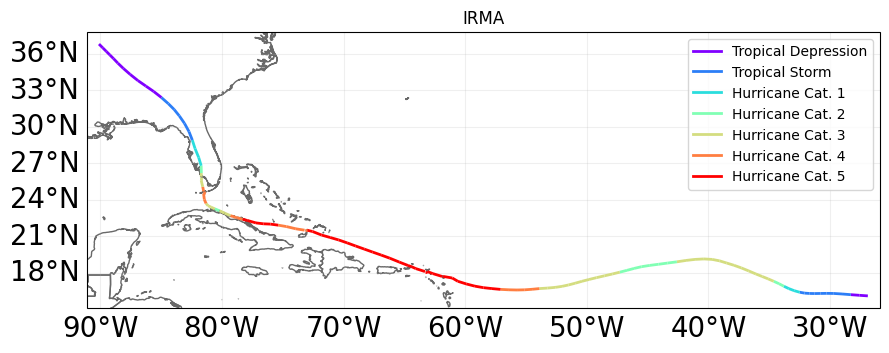

In [3]:
ax = tr_irma.plot()
ax.set_title('IRMA') # set title

Checking time step

In [4]:
from klearn_tcyclone.utils import check_time_steps_TCTracks

In [5]:
sel_ibtracs = TCTracks.from_ibtracs_netcdf(provider='usa', year_range=(1993, 2004), basin='EP', correct_pres=False)
print('Number of tracks:', sel_ibtracs.size)

2024-09-01 09:12:29,814 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2023-06-07 23:07:38 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file C:\Users\Eric\climada\data\IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.
2024-09-01 09:12:30,725 - climada.hazard.tc_tracks - WARNING - 85 storm events are discarded because no valid wind/pressure values have been found: 1993178N14265, 1993221N12216, 1993223N07185, 1993246N16129, 1993263N11168, ...


d:\work\projects\repositories\koopman_learning_tropical_cyclone\.venv\lib\site-packages\climada\hazard\tc_tracks.py:614: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if ibtracs_ds.dims['storm'] == 0:


Number of tracks: 185


In [6]:
check_time_steps_TCTracks(sel_ibtracs, time_step_h = 3)

False

Set all timesteps equal.

In [7]:
sel_ibtracs.equal_timestep(3)

d:\work\projects\repositories\koopman_learning_tropical_cyclone\.venv\lib\site-packages\climada\hazard\tc_tracks.py:1508: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "_one_interp_data" failed type inference due to: non-precise type pyobject
During: typing of argument at d:\work\projects\repositories\koopman_learning_tropical_cyclone\.venv\lib\site-packages\climada\hazard\tc_tracks.py (1542)

File "..\.venv\lib\site-packages\climada\hazard\tc_tracks.py", line 1542:
    def _one_interp_data(track, time_step_h, land_geom=None):
        <source elided>

            time_step = pd.tseries.frequencies.to_offset(pd.Timedelta(hours=time_step_h)).freqstr
            ^

  @staticmethod


In [8]:
check_time_steps_TCTracks(sel_ibtracs, time_step_h = 3)

True

Plotting

In [9]:
sel_ibtracs = TCTracks.from_ibtracs_netcdf(provider='usa', year_range=(1993, 2004), basin='EP', correct_pres=False)
print('Number of tracks:', sel_ibtracs.size)

2024-09-01 09:12:37,445 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2023-06-07 23:07:38 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file C:\Users\Eric\climada\data\IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.
2024-09-01 09:12:38,252 - climada.hazard.tc_tracks - WARNING - 85 storm events are discarded because no valid wind/pressure values have been found: 1993178N14265, 1993221N12216, 1993223N07185, 1993246N16129, 1993263N11168, ...


d:\work\projects\repositories\koopman_learning_tropical_cyclone\.venv\lib\site-packages\climada\hazard\tc_tracks.py:614: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if ibtracs_ds.dims['storm'] == 0:


Number of tracks: 185


In [10]:
tc_tracks = sel_ibtracs.data

In [11]:
sel_ibtracs.equal_timestep(time_step_h=3)
tc_tracks_resampled = sel_ibtracs.data

In [12]:
tc_track = tc_tracks[12]

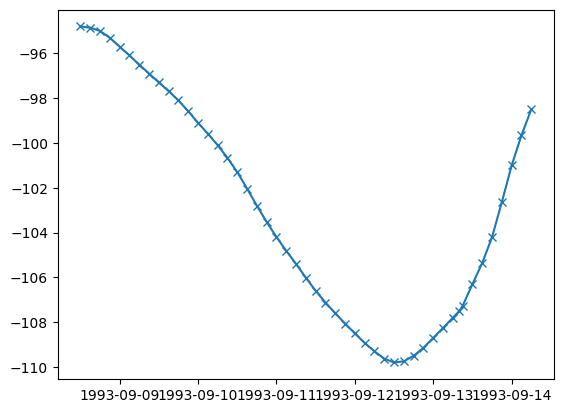

In [13]:
plt.plot(tc_track.time.data, tc_track.lon.data, "x-")

In [14]:
tc_track_resampled = tc_tracks_resampled[12]

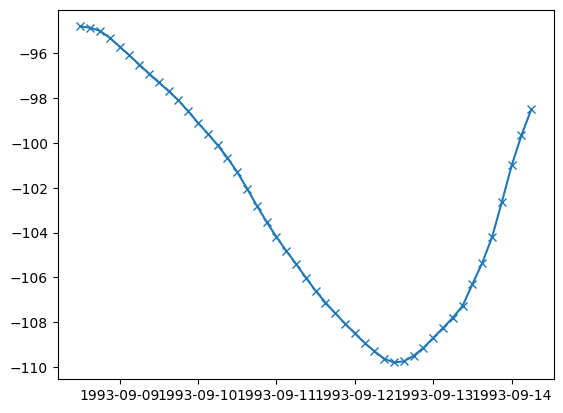

In [15]:
plt.plot(tc_track_resampled.time.data, tc_track_resampled.lon.data, "x-")